<a href="https://colab.research.google.com/github/anilsrml/LifeExpectancy/blob/main/predictionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Veri setimiz ile dataframe oluşturuyoruz

In [ ]:
import pandas as pd
df = pd.read_csv("Life Expectancy Data.csv")
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


Satır ve sütun sayısı

In [ ]:
df.shape

(2938, 22)

Dataframe hakkında içerik bilgisi

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

Gerekli kütüphanelerin tanımlanması

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

Dataframe içinde null değer sorgusu

In [ ]:
df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


Nümerik sütunlarda null değer var ise ortalama ile doldurma

In [ ]:
for column in df.columns:
    if column != 'Country' and column != 'Status': # Exclude 'Status' column
        # Her bir sütundaki ortalamayı hesapla ve eksik değerlere ata
        df[column] = df[column].fillna(df[column].mean())

In [ ]:
df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0


Bu kod, eğitim ve test veri setlerindeki aykırı değerleri tespit edip sınırlarla düzelterek aykırı değer etkisini azaltmayı amaçlıyor.

In [ ]:
df_train,df_test=train_test_split(df,test_size=0.2,random_state=42)

# Aykırı değerleri tespit eden ve sınırlarla düzelten fonksiyon
def outlier_threshhold(dataframe, column):
    q1 = dataframe[column].quantile(0.25)  # 1. çeyrek
    q3 = dataframe[column].quantile(0.75)  # 3. çeyrek
    iqr = q3 - q1  # Çeyrekler arası mesafe
    low_limit = q1 - 1.5 * iqr
    up_limit = q3 + 1.5 * iqr
    return low_limit, up_limit

# Aykırı değerleri düzeltme fonksiyonu
def replace_with_threshholds(dataframe, dataframe2, column):
    low_limit, up_limit = outlier_threshhold(dataframe, column)
    dataframe.loc[(dataframe[column] < low_limit), column] = low_limit
    dataframe.loc[(dataframe[column] > up_limit), column] = up_limit
    dataframe2.loc[(dataframe2[column] < low_limit), column] = low_limit
    dataframe2.loc[(dataframe2[column] > up_limit), column] = up_limit

# Aykırı değer yüzdesini hesaplayan fonksiyon
def outlier_percentage(dataframe, column):
    low_limit, up_limit = outlier_threshhold(dataframe, column)
    # Aykırı değerlerin sayısını bulma
    outliers = dataframe[(dataframe[column] < low_limit) | (dataframe[column] > up_limit)]
    # Aykırı değerlerin yüzdesini hesaplama
    outlier_pct = len(outliers) / len(dataframe) * 100
    return outlier_pct

# Sayısal sütunları seçme (Country ve Status hariç)
num_columns = df_train.select_dtypes(include=[np.number]).columns.tolist()
num_columns.remove('Year')  # 'Year' sütununu çıkar

# Aykırı değerler öncesi yüzdelik değerleri yazdırma
print("Aykırı Değerler - Öncesi Yüzdelik Dağılım:")
for column in num_columns:
    pct_before = outlier_percentage(df_train, column)
    print(f"{column}: {pct_before:.2f}%")

# Aykırı değerleri düzeltme işlemi
for column in num_columns:
    replace_with_threshholds(df_train, df_test, column)

# Aykırı değerler sonrası yüzdelik değerleri yazdırma
print("\nAykırı Değerler - Sonrası Yüzdelik Dağılım:")
for column in num_columns:
    pct_after = outlier_percentage(df_train, column)
    print(f"{column}: {pct_after:.2f}%")


Aykırı Değerler - Öncesi Yüzdelik Dağılım:
Life expectancy : 0.60%
Adult Mortality: 3.23%
infant deaths: 11.49%
Alcohol: 0.09%
percentage expenditure: 12.85%
Hepatitis B: 10.51%
Measles : 18.43%
 BMI : 0.00%
under-five deaths : 13.15%
Polio: 9.45%
Total expenditure: 1.83%
Diphtheria : 10.17%
 HIV/AIDS: 18.38%
GDP: 9.79%
Population: 6.47%
 thinness  1-19 years: 3.66%
 thinness 5-9 years: 3.83%
Income composition of resources: 4.09%
Schooling: 2.30%

Aykırı Değerler - Sonrası Yüzdelik Dağılım:
Life expectancy : 0.00%
Adult Mortality: 0.00%
infant deaths: 0.00%
Alcohol: 0.00%
percentage expenditure: 0.00%
Hepatitis B: 0.00%
Measles : 0.00%
 BMI : 0.00%
under-five deaths : 0.00%
Polio: 0.00%
Total expenditure: 0.00%
Diphtheria : 0.00%
 HIV/AIDS: 0.00%
GDP: 0.00%
Population: 0.00%
 thinness  1-19 years: 0.00%
 thinness 5-9 years: 0.00%
Income composition of resources: 0.00%
Schooling: 0.00%


<ipython-input-9-0e5fa4417366>:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-31.125' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[column] < low_limit), column] = low_limit
<ipython-input-9-0e5fa4417366>:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-31.125' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe2.loc[(dataframe2[column] < low_limit), column] = low_limit
<ipython-input-9-0e5fa4417366>:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-534.375' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[column] < low_limit), column] = low_limit
<ipython-i

Gerekli sütun ismi değişiklikleri

In [ ]:
# Kolon isimlerini Türkçeye çevirme
df.rename(columns={
    'Country': 'Ülke',
    'Year': 'Yıl',
    'Status': 'Durum',
    'Life expectancy ': 'Yaşam Beklentisi',
    'Adult Mortality': 'Yetişkin Ölüm Oranı',
    'infant deaths': 'Bebek Ölüm Sayısı',
    'Alcohol': 'Alkol Tüketimi',
    'percentage expenditure': 'Sağlık Harc. GSYİH Oranı',
    'Hepatitis B': 'Hepatit B Aşı Oranı',
    'Measles ': 'Kızamık Vakaları',
    ' BMI ': 'Vücut Kitle İndeksi',
    'under-five deaths ': 'Beş Yaş Altı Ölüm',
    'Polio': 'Polio Aşı Oranı',
    'Total expenditure': 'Sağlık Harc. Toplam Harcama Oranı',
    'Diphtheria ': 'Difteri Aşı Oranı',
    ' HIV/AIDS': 'HIV/AIDS Ölüm Oranı',
    'GDP': 'GSYİH (USD)',
    'Population': 'Nüfus',
    ' thinness  1-19 years': 'Zayıflık Oranı(10-19)',
    ' thinness 5-9 years': 'Zayıflık Oranı(5-9)',
    'Income composition of resources': 'Gelir Bileşimi Endeksi',
    'Schooling': 'Okuma Süresi(Yıl)'
}, inplace=True)


In [ ]:
df.describe()

,Yıl,Yaşam Beklentisi,Yetişkin Ölüm Oranı,Bebek Ölüm Sayısı,Alkol Tüketimi,Sağlık Harc. GSYİH Oranı,Hepatit B Aşı Oranı,Kızamık Vakaları,Vücut Kitle İndeksi,Beş Yaş Altı Ölüm,Polio Aşı Oranı,Sağlık Harc. Toplam Harcama Oranı,Difteri Aşı Oranı,HIV/AIDS Ölüm Oranı,GSYİH (USD),Nüfus,Zayıflık Oranı(10-19),Zayıflık Oranı(5-9),Gelir Bileşimi Endeksi,Okuma Süresi(Yıl)
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.938190,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.507640,124.080302,117.926501,3.916288,1987.914858,22.586855,11467.272489,19.927677,160.445548,23.352143,2.400274,23.640073,5.077785,13136.800417,5.381546e+07,4.394535,4.482708,0.204820,3.264381
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,80.940461,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.000000,144.000000,3.000000,4.160000,64.912906,87.000000,17.000000,43.000000,4.000000,93.000000,5.938190,93.000000,0.100000,3116.561755,3.675929e+06,3.400000,3.400000,0.662000,12.100000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,7483.158469,1.275338e+07,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


Tüm sütunların histogram grafikleri

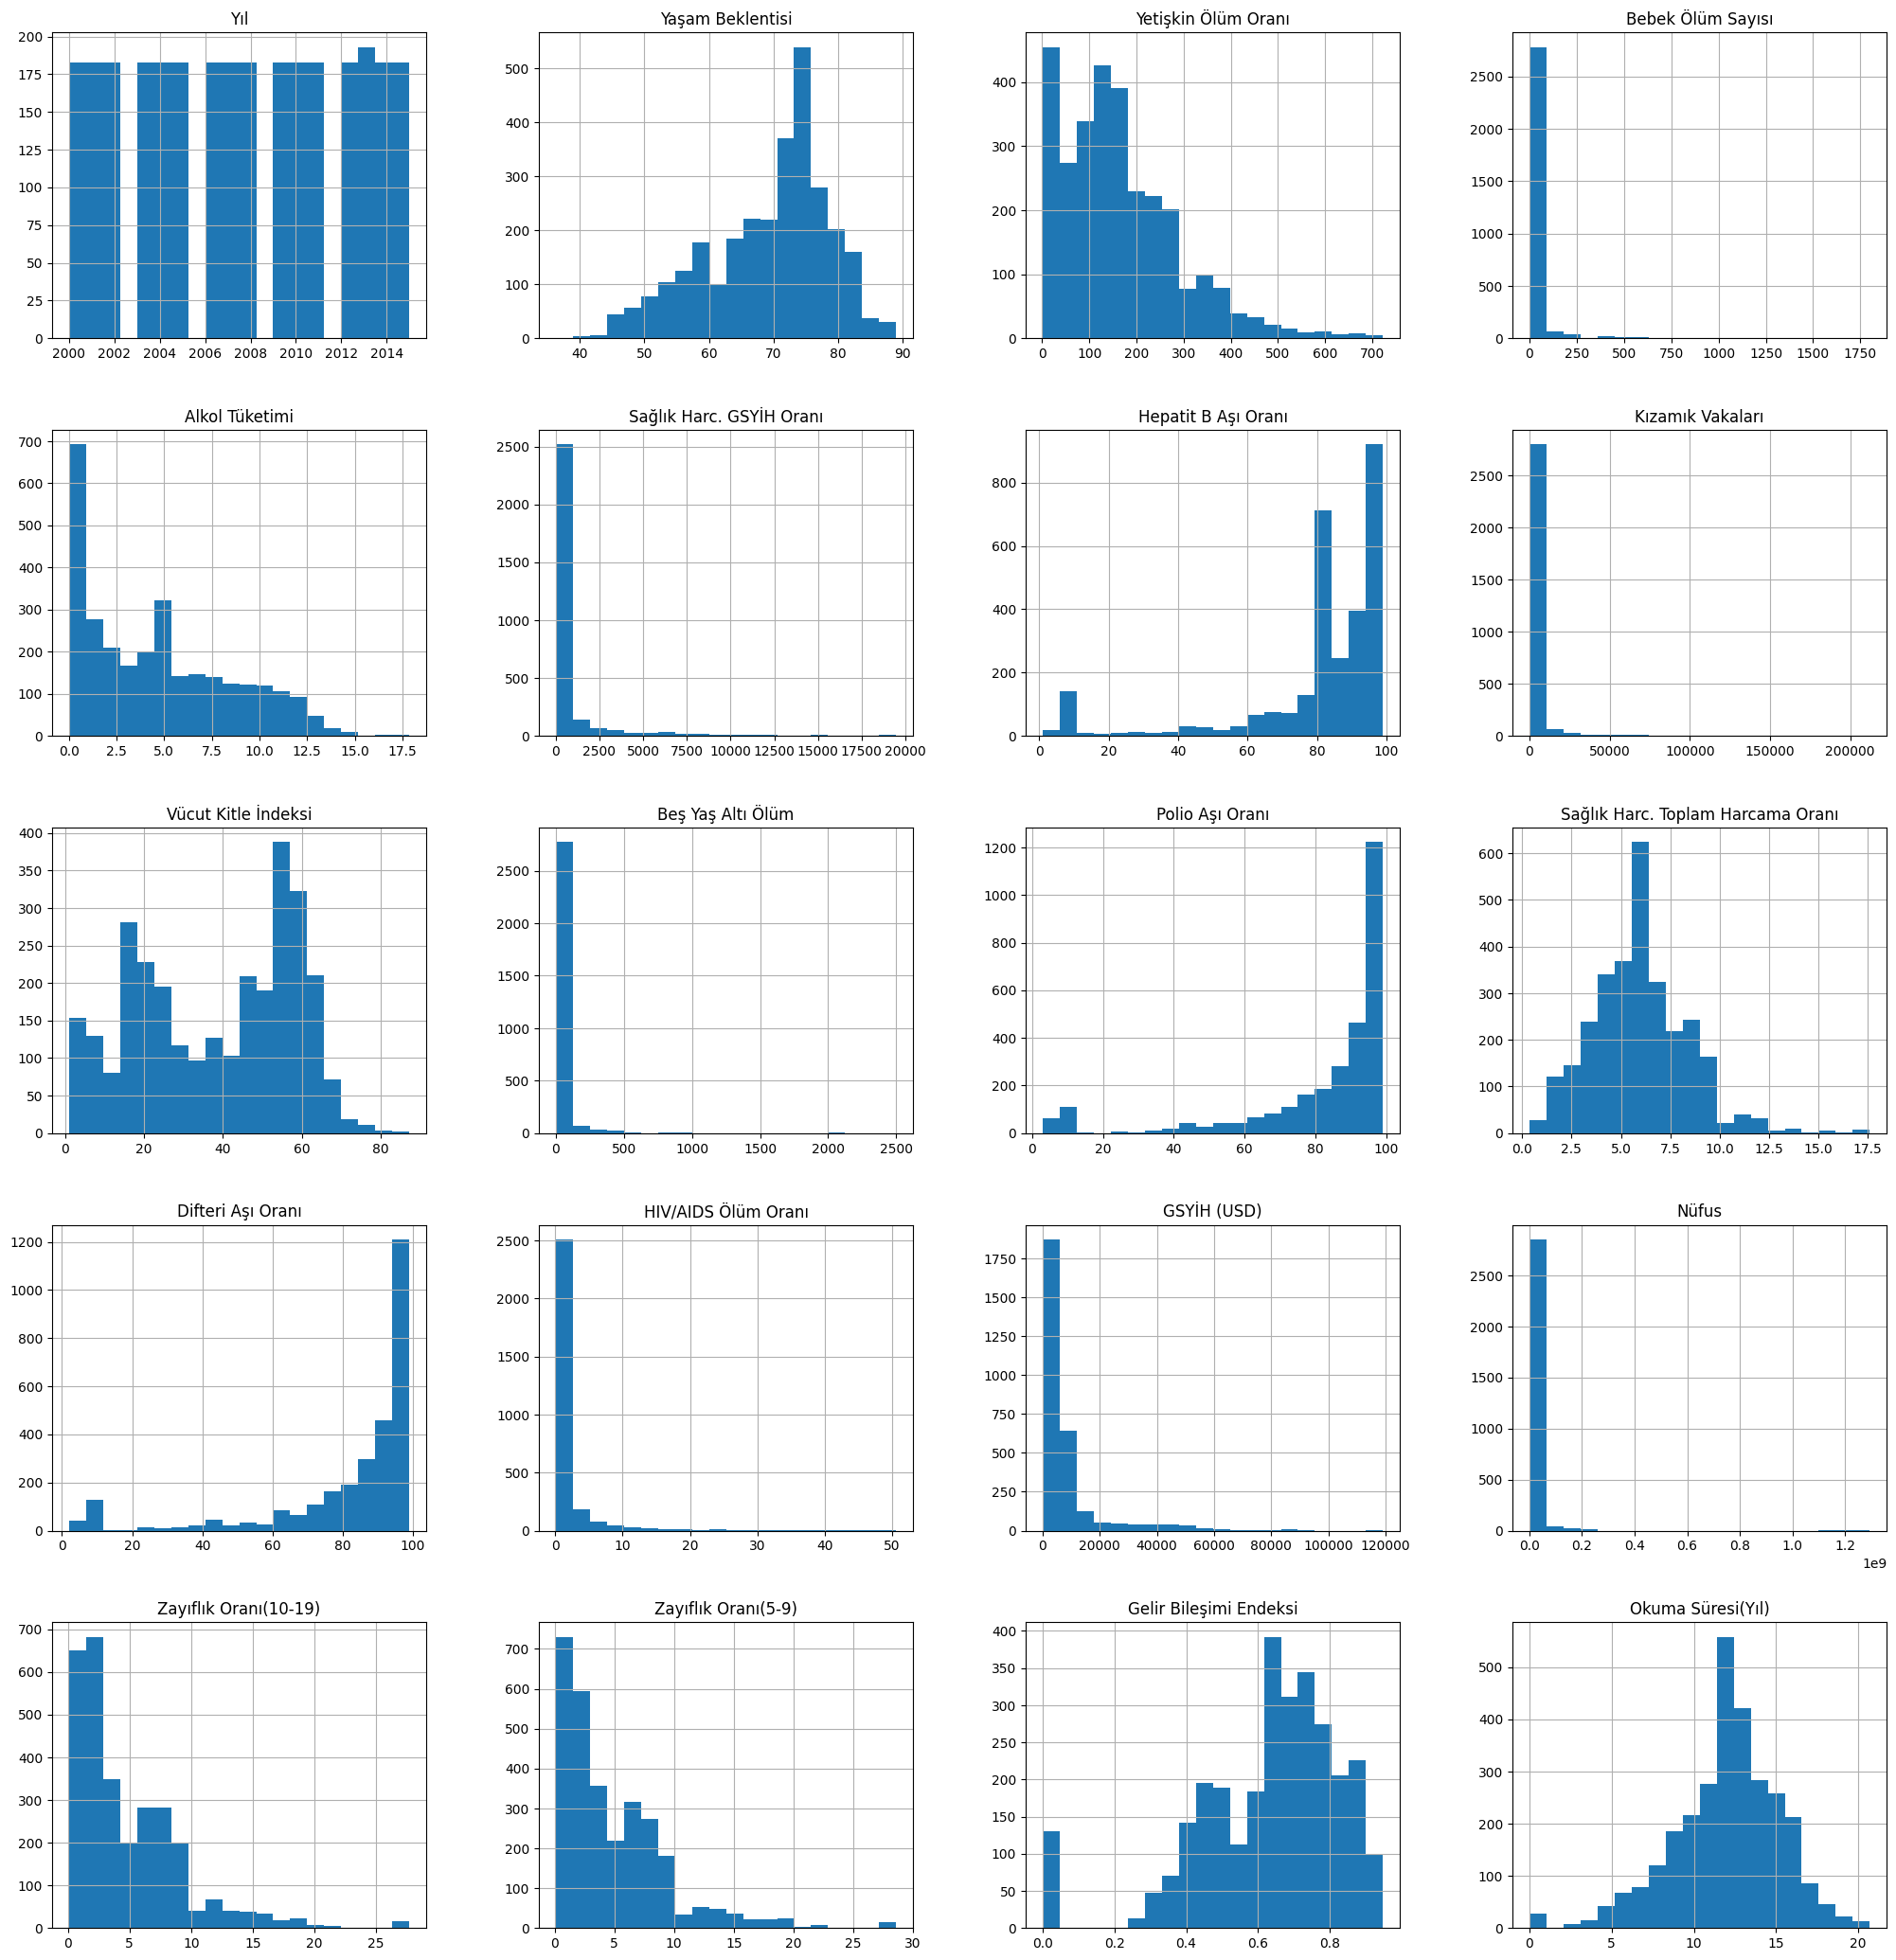

In [ ]:
df.hist(bins=20, figsize=(25,26))
plt.show()

Bu ko kategorik değişkenlerimizi nümerik olarak ifade edibilmemizi sağlar

In [ ]:
# Ülkeleri sayısal değerlere dönüştürme
labelencoder = LabelEncoder()
df['Ülke'] = labelencoder.fit_transform(df['Ülke'])

# Durum sütununu sayısal hale getirme
df['Durum'] = labelencoder.fit_transform(df['Durum']).astype(int)

# Kontrol için ilk birkaç satırı yazdırma
print(df[['Ülke', 'Durum']].head())

   Ülke  Durum
0     0      1
1     0      1
2     0      1
3     0      1
4     0      1


In [ ]:
df['Ülke'].groupby(df['Ülke']).count()

,Ülke
Ülke,
0,16
1,16
2,16
3,16
4,16
...,...
188,16
189,16
190,16


Tablomuzun korelasyon matrisi

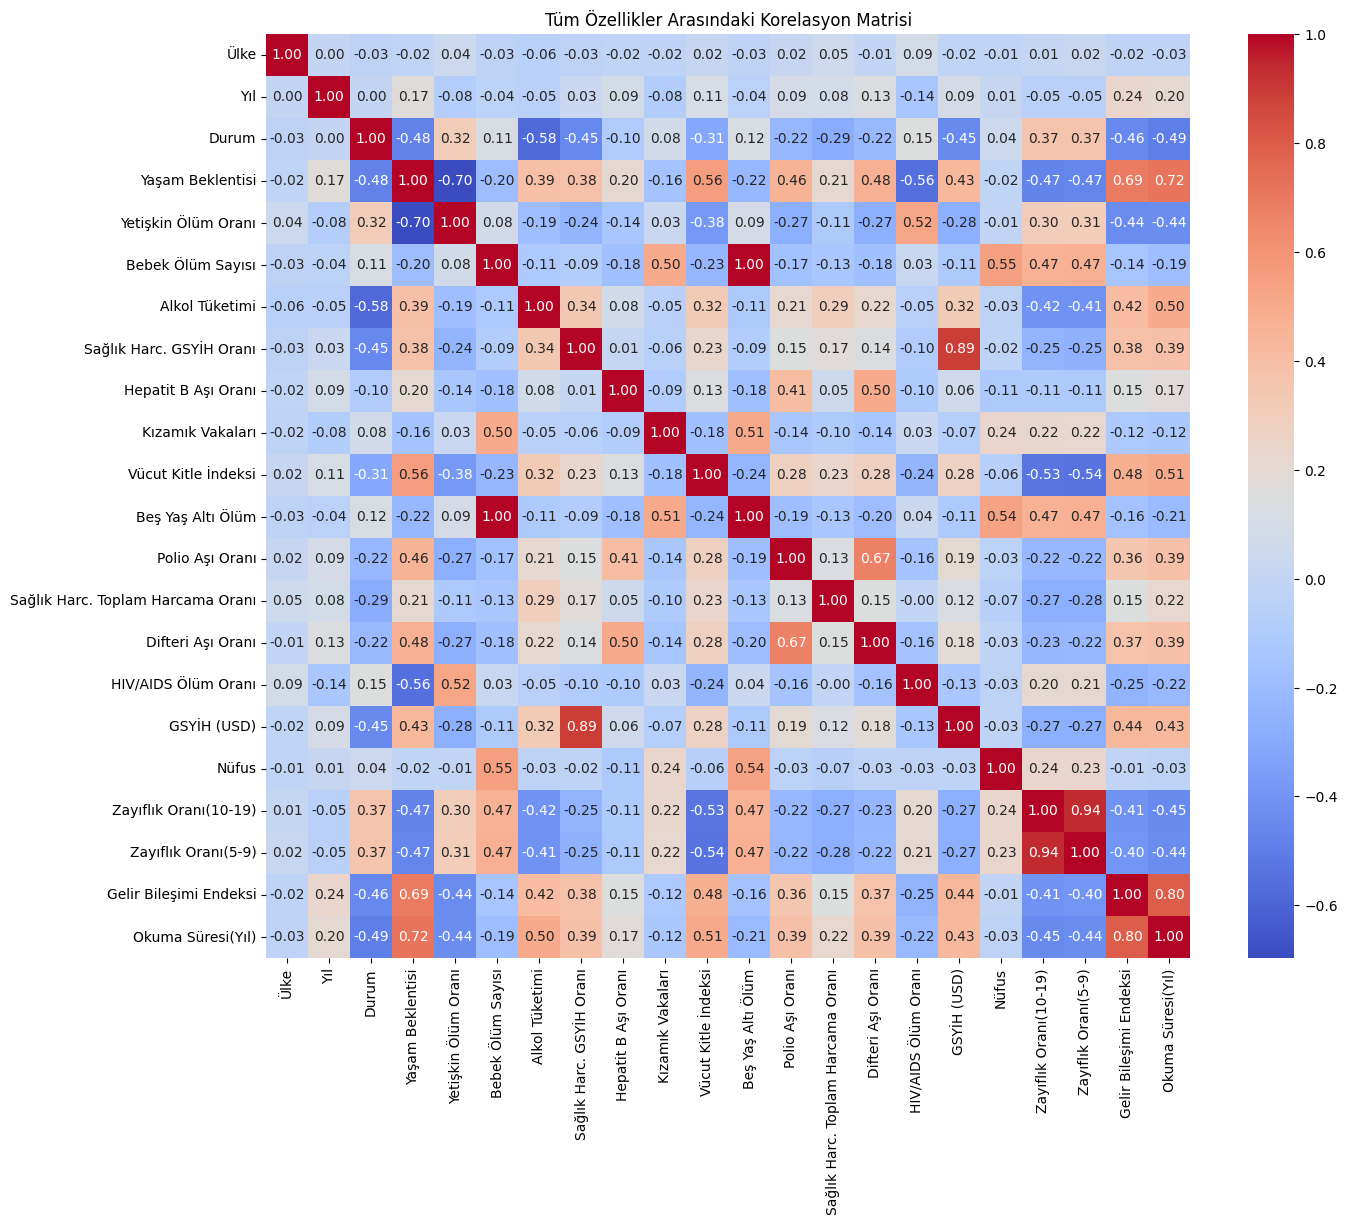

In [ ]:
corr_matrix = df.corr()

# Korelasyon matrisini görselleştirme
plt.figure(figsize=(15, 12))  # Grafik boyutunu büyüt
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Tüm Özellikler Arasındaki Korelasyon Matrisi")
plt.show()

Hedef sütun belirlenip eğitim ve test veri setleri oluşturulur

In [ ]:
target_column = 'Yaşam Beklentisi'
X = df.drop(columns=[target_column])
y = df[target_column]

# Veriyi eğitim ve test olarak ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Veriyi standardize etme (opsiyonel)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lineer Regresyon Modeli

En İyi Parametreler: {'alpha': 0.1, 'max_iter': 100}
RMSE: 3.9962117431957007
R²: 0.8257200181047278


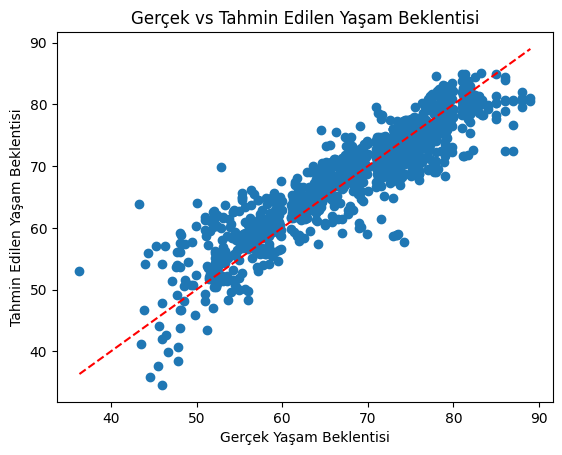

In [ ]:
# Modeli oluşturma ve eğitme
model = LinearRegression()
model.fit(X_train_scaled, y_train)


# Parametre grid'i belirleme
# Use 'alpha' for Ridge or Lasso
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100, 1000],
    'max_iter': [100, 200, 500, 1000, 2000]
}

# GridSearchCV ile modelin hiperparametrelerini ayarlama
# Replace LinearRegression with Ridge
grid_search = GridSearchCV(Ridge(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# En iyi parametreleri ve modeli görmek
print("En İyi Parametreler:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Use the best model for prediction
y_pred = best_model.predict(X_test_scaled)

# Performans metrikleri
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
linear_model_r2 = r2_score(y_test, y_pred)


print(f"RMSE: {rmse}")
print(f"R²: {linear_model_r2}")
# Gerçek vs Tahmin Grafiği
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Gerçek Yaşam Beklentisi')
plt.ylabel('Tahmin Edilen Yaşam Beklentisi')
plt.title('Gerçek vs Tahmin Edilen Yaşam Beklentisi')
plt.show()

# Random Forest Modelini

En İyi Parametreler: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': True}
RMSE: 1.841540282216875
R²: 0.962990521196745


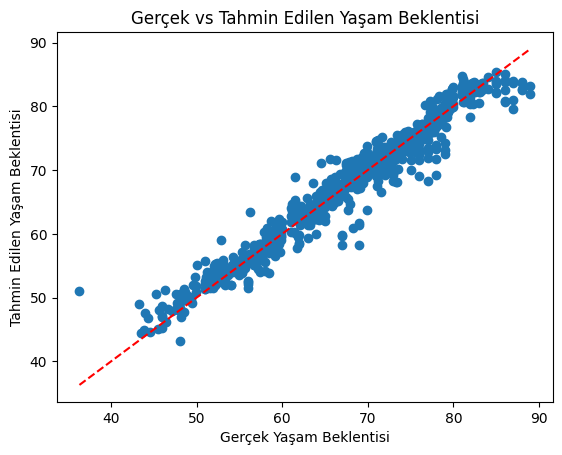

In [ ]:
# Random Forest Modelini oluşturma
rf_model = RandomForestRegressor(random_state=42)

# Parametreler için dağılımlar
param_dist = {
    'n_estimators': [150, 200],  # Ağaç sayısı
    'max_depth': [None, 10, 20],  # Derinlik
    'min_samples_split': [2, 5],  # Bölme için minimum örnek sayısı
    'min_samples_leaf': [1, 2],  # Yaprak için minimum örnek sayısı
    'bootstrap': [True]  # Bootstrap
}

# RandomizedSearchCV ile hiperparametre araması
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=20, cv=3, random_state=42, n_jobs=-1)

# Modeli eğitme
random_search.fit(X_train_scaled, y_train)

# En iyi parametreler
print("En İyi Parametreler:", random_search.best_params_)

# En iyi modeli al
best_rf_model = random_search.best_estimator_

# Tahmin yapma
y_pred = best_rf_model.predict(X_test_scaled)

# Performans metrikleri
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rf_model_r2 = r2_score(y_test, y_pred)


# Performans metriklerini yazdırma
print(f"RMSE: {rmse}")
print(f"R²: {rf_model_r2}")

# Gerçek vs Tahmin Grafiği
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Gerçek Yaşam Beklentisi')
plt.ylabel('Tahmin Edilen Yaşam Beklentisi')
plt.title('Gerçek vs Tahmin Edilen Yaşam Beklentisi')
plt.show()


#K-en yakın komşu Modeli

En iyi parametreler: {'algorithm': 'ball_tree', 'n_neighbors': 3, 'weights': 'distance'}
RMSE (En iyi model): 2.7129418703534545
R² (En iyi model): 0.9196785574954909


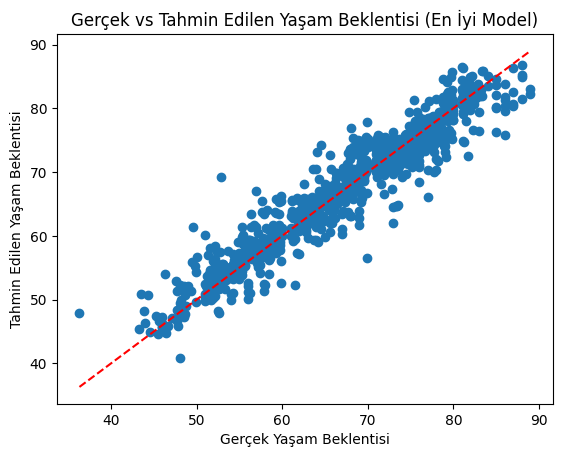

In [ ]:
# KNN için parametre ızgarası oluşturma
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# GridSearchCV ile en iyi parametreyi bulma
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# En iyi parametreleri seç ve en iyi modeli oluştur
best_knn = grid_search.best_estimator_
y_pred_best = best_knn.predict(X_test_scaled)

# Performans metriklerini hesaplama
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = mse_best**0.5
knn_r2 = r2_score(y_test, y_pred_best)


# Sonuçları ekrana yazdır
print(f"En iyi parametreler: {grid_search.best_params_}")
print(f"RMSE (En iyi model): {rmse_best}")
print(f"R² (En iyi model): {knn_r2}")

# Gerçek vs Tahmin Grafiği (En iyi model için)
plt.scatter(y_test, y_pred_best)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Gerçek Yaşam Beklentisi')
plt.ylabel('Tahmin Edilen Yaşam Beklentisi')
plt.title('Gerçek vs Tahmin Edilen Yaşam Beklentisi (En İyi Model)')
plt.show()


#Support Vector Regresyon Modeli

En iyi parametreler: {'C': 100, 'epsilon': 0.1, 'kernel': 'rbf'}
Eğitim Hatası (MSE): 1.850835497778677
Test Hatası (MSE): 5.394292356999989
Eğitim R2 Skoru: 0.9792797022605323
Test R2 Skoru: 0.9411312243865819


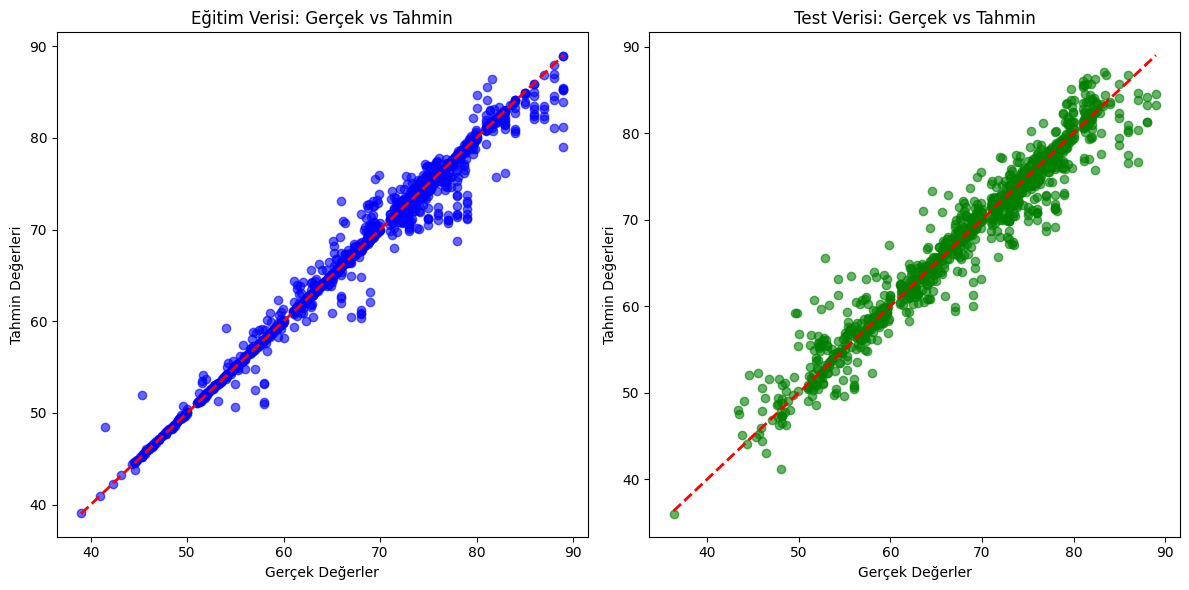

In [ ]:
# Hiperparametre arama için GridSearchCV
param_grid = {
    'kernel': ['linear','rbf'],
    'C': [1, 10, 100],
    'epsilon': [0.1, 0.2, 0.5]
}

grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# En iyi modeli seç
best_svr = grid_search.best_estimator_
print("En iyi parametreler:", grid_search.best_params_)

# En iyi model ile tahmin yap
train_predictions = best_svr.predict(X_train_scaled)
test_predictions = best_svr.predict(X_test_scaled)

# Performans değerlendirme
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)
svr_r2 = test_r2

print("Eğitim Hatası (MSE):", train_mse)
print("Test Hatası (MSE):", test_mse)
print("Eğitim R2 Skoru:", train_r2)
print("Test R2 Skoru:", test_r2)

# Görselleştirme
plt.figure(figsize=(12, 6))

# Eğitim veri seti tahminleri
plt.subplot(1, 2, 1)
plt.scatter(y_train, train_predictions, alpha=0.6, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], '--r', linewidth=2)
plt.title('Eğitim Verisi: Gerçek vs Tahmin')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Değerleri')

# Test veri seti tahminleri
plt.subplot(1, 2, 2)
plt.scatter(y_test, test_predictions, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Test Verisi: Gerçek vs Tahmin')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Değerleri')

plt.tight_layout()
plt.show()


#XGBoost Modeli

RMSE: 1.9029433701326575
R²: 0.9604813362483845


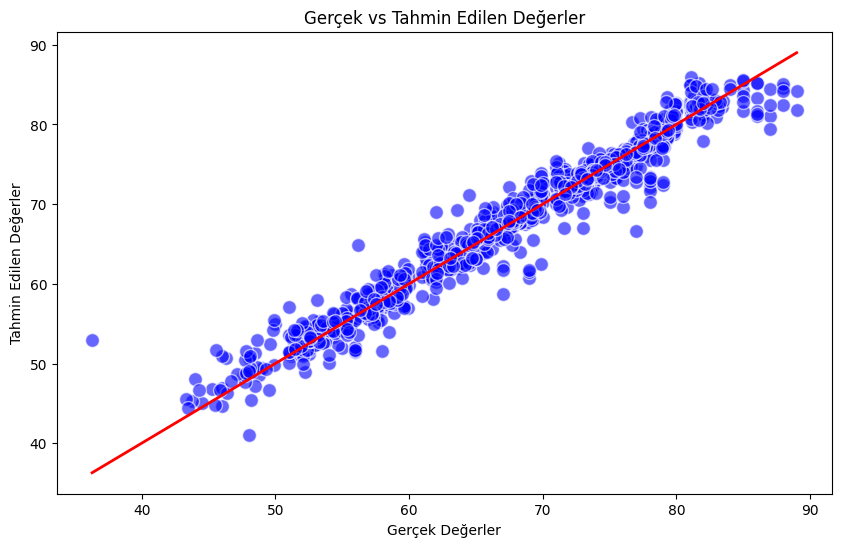

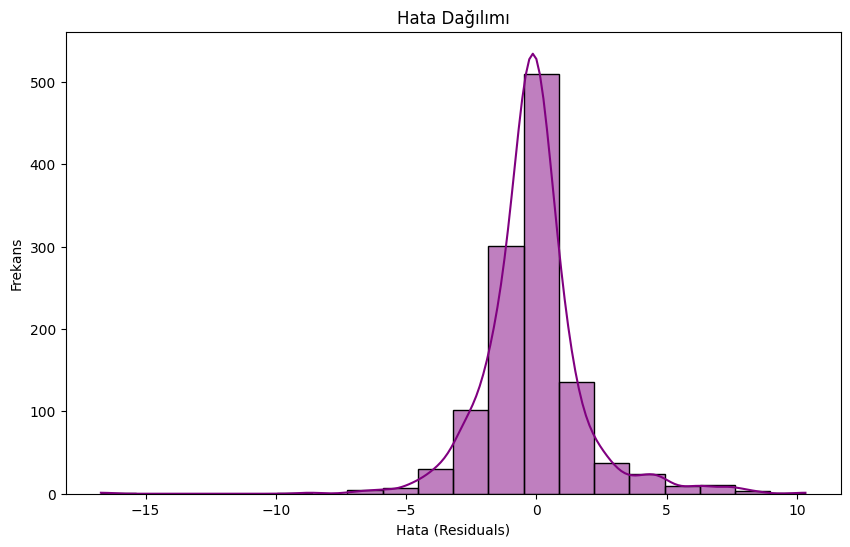

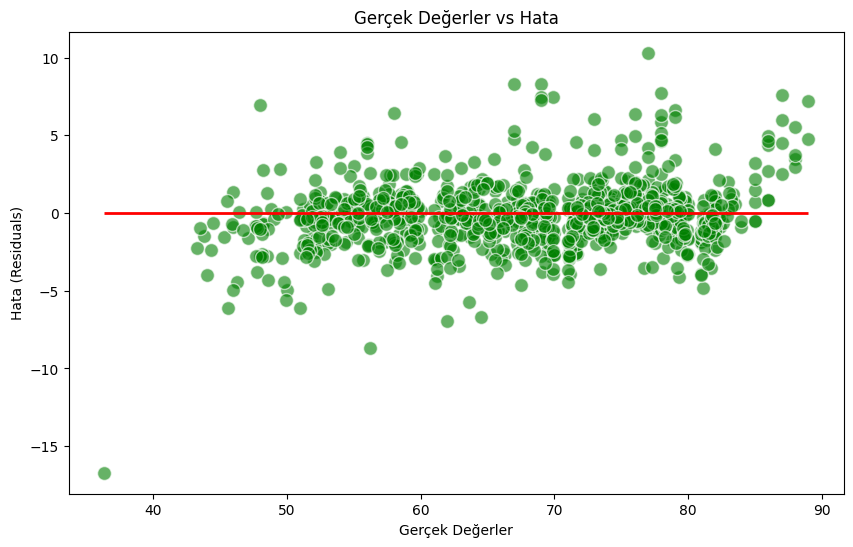

In [ ]:
# XGBoost Modelinin Kurulması
xgb_model = XGBRegressor()

# Modelin Eğitilmesi
xgb_model.fit(X_train, y_train)

# Modelin Test Verisi Üzerinde Değerlendirilmesi
y_pred = xgb_model.predict(X_test)

# Sonuçların Değerlendirilmesi
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
xgb_r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R²: {xgb_r2}")

# Gerçek ve tahmin edilen değerlerin karşılaştırılması
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, edgecolors="w", s=100)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Gerçek vs Tahmin Edilen Değerler')
plt.show()

# Hata Dağılımı (Residuals)
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple', bins=20)
plt.xlabel('Hata (Residuals)')
plt.ylabel('Frekans')
plt.title('Hata Dağılımı')
plt.show()

# Hata vs Gerçek Değerler
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, color='green', alpha=0.6, edgecolors="w", s=100)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), color='red', linewidth=2)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Hata (Residuals)')
plt.title('Gerçek Değerler vs Hata')
plt.show()
